# Please note:
If you encounter any issues related to file paths, make sure to open the file located at the following path:
`/Users/fd/gitlocal/bootcamp_mingjia_jin/project/notebooks` — the file name should match.

All data files and Python functions can be found under the corresponding `/data` and `/src` folders within:
`/Users/fd/gitlocal/bootcamp_mingjia_jin/project`.

# Homework Starter — Stage 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [7]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
n = 160
df = pd.DataFrame({
    'date': pd.date_range('2021-02-01', periods=n, freq='D'),
    'region': np.random.choice(['North','South','East','West'], size=n),
    'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    'transactions': np.random.poisson(lam=3, size=n),
})
base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)

# inject a bit of missingness and outliers
df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12
df.head()

,date,region,age,income,transactions,spend
0,2021-02-01,West,37.6,28086.81,4,73.35
1,2021-02-02,North,43.0,33034.75,1,52.37
2,2021-02-03,South,38.2,50045.39,2,131.85
3,2021-02-04,South,24.9,39467.28,4,147.58
4,2021-02-05,South,59.8,31201.65,1,86.76


## 1) First look

In [8]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          160 non-null    datetime64[ns]
 1   region        160 non-null    object        
 2   age           160 non-null    float64       
 3   income        155 non-null    float64       
 4   transactions  160 non-null    int64         
 5   spend         157 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 7.6+ KB


(None,
 date            0
 region          0
 age             0
 income          5
 transactions    0
 spend           3
 dtype: int64)

## 2) Numeric profile

In [10]:
# Numeric Summary Table with Skew and Kurtosis
desc = df[['age','income','transactions','spend']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
age,160.0,40.018750,8.458676,22.00,34.70,40.15,44.925,61.10,0.069538,-0.080125
income,155.0,41983.866323,13262.457038,17928.80,32471.53,39332.52,49697.690,87052.40,0.993336,0.918722
transactions,160.0,3.237500,2.585610,0.00,2.00,3.00,4.000,20.00,3.466078,19.984802
spend,157.0,117.291592,51.768645,0.54,77.25,119.32,153.340,280.05,0.130860,-0.084917


## 3) Distributions (TODO: add at least 3)
1. **Income** shows a right-skewed distribution. This suggests a log-transform may help for modeling.
2. **Spend** is also slightly right-skewed but more concentrated. Some missing values present.
3. **Transactions** contains extreme outliers (as seen in the boxplot), which might distort model results. Consider winsorizing or using robust methods.

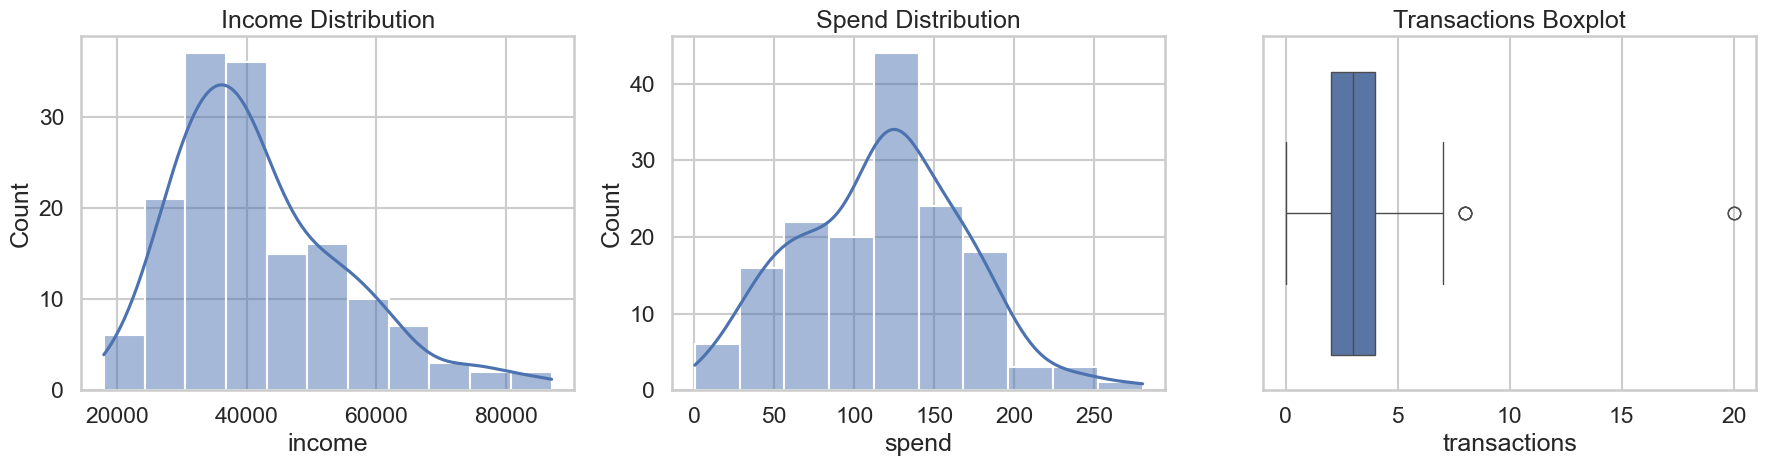

In [11]:
# # TODO: histogram + KDE for a key variable
# sns.histplot(df['income'], kde=True)
# plt.title('Income Distribution')
# plt.show()

# # TODO: boxplot for outliers
# sns.boxplot(x=df['transactions'])
# plt.title('Transactions (Outliers)')
# plt.show()

# Create a figure with 1 row and 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# 1. Plot the distribution of income with a KDE curve
sns.histplot(df['income'], kde=True, ax=ax[0])
ax[0].set_title('Income Distribution')

# 2. Plot the distribution of spend with a KDE curve
sns.histplot(df['spend'], kde=True, ax=ax[1])
ax[1].set_title('Spend Distribution')

# 3. Boxplot of transactions to detect potential outliers
sns.boxplot(x=df['transactions'], ax=ax[2])
ax[2].set_title('Transactions Boxplot')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## 4) Relationships (TODO: add at least 2)
1. **Income vs Spend**  
   There's a positive relationship between income and spend. As income increases, spend tends to increase.  
   Regional clusters are visible, suggesting that region may moderate this relationship.

2. **Age vs Spend**  
   The scatterplot shows no obvious linear relationship. Spend appears more variable across age groups.  
   We might explore interaction terms or nonlinear models in the future.

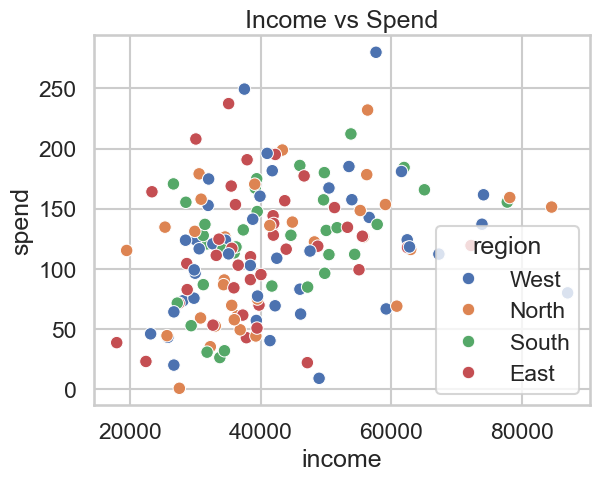

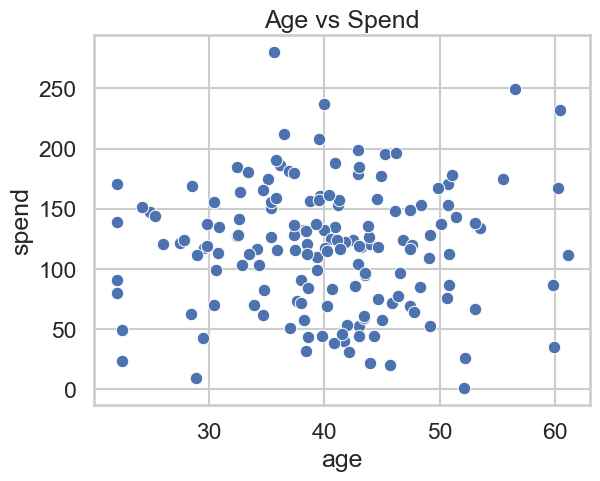

In [12]:
sns.scatterplot(data=df, x='income', y='spend', hue='region')
plt.title('Income vs Spend')
plt.show()

sns.scatterplot(data=df, x='age', y='spend')
plt.title('Age vs Spend')
plt.show()

## 5) skip (Optional) Correlation matrix

In [ ]:
# corr = df[['age','income','transactions','spend']].corr(numeric_only=True)
# sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
# plt.title('Correlation Matrix')
# plt.show()
# corr

## 6) Insights & Assumptions (write your commentary)
- TODO: Top 3 insights
- TODO: Assumptions & risks
- TODO: Next steps before modeling (cleaning & features)

#### Top 3 Insights

1. **Income and Spend are Positively Correlated**  
   Higher income tends to be associated with higher spend, though with some variance across regions.

2. **Income is Right-Skewed**  
   The distribution of income is heavily right-skewed, indicating that a **log-transform** may help normalize this feature before modeling.

3. **Transactions Feature Contains Outliers**  
   A small number of users have abnormally high transaction counts. These outliers could bias models and may require **winsorization or robust methods**.

---

#### Assumptions & Risks

- **Missing values** are assumed to be **Missing At Random (MAR)**, making imputation with median/mode appropriate. If this is wrong, we risk introducing bias.
- Outliers are treated as **noise or error**; however, they may contain valid edge behavior. Removing them could lead to **loss of important signals**.
- KDE and scatterplots assume **continuous and independent distributions**, but real-world data may violate these assumptions due to seasonality or grouped effects.

---

#### Next Steps Before Modeling

- **Impute missing values** in `income` and `spend` using median (numeric) or mode (categorical).
- **Apply log-transform** to `income` to reduce skew and improve model interpretability.
- **Handle outliers** in `transactions` via winsorization or robust regression.
- **Engineer new features** such as:
  - log_income
  - interaction terms (e.g., age × transactions)
  - one-hot encoding for `region`
- **Split dataset** into train-test sets and validate assumptions via cross-validation.
